In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
# Data CLeaning Process

data[data.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
'''
From index 0-121 all the records are from Bejaya Region
Records from 122 are Sidi-Bel Abbes Region
if Bejaya: label=0
else: label=1
'''

data.loc[:122,'Region']=0
data.loc[123:,'Region']=1

In [9]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [12]:
data['Region']=data['Region'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [13]:
data=data.dropna().reset_index()

In [14]:
data.isnull().sum()

index          0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
data.iloc[123]

index                  124
day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 123, dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        244 non-null    int64 
 1   day          244 non-null    object
 2   month        244 non-null    object
 3   year         244 non-null    object
 4   Temperature  244 non-null    object
 5    RH          244 non-null    object
 6    Ws          244 non-null    object
 7   Rain         244 non-null    object
 8   FFMC         244 non-null    object
 9   DMC          244 non-null    object
 10  DC           244 non-null    object
 11  ISI          244 non-null    object
 12  BUI          244 non-null    object
 13  FWI          244 non-null    object
 14  Classes      244 non-null    object
 15  Region       244 non-null    int64 
dtypes: int64(2), object(14)
memory usage: 30.6+ KB


In [17]:
df=data

In [18]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df['Classes']=df['Classes'].str.strip()

In [21]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [22]:
df.drop(122,inplace=True)

In [23]:
df.iloc[122]

index               124
day                  01
month                06
year               2012
Temperature          32
RH                   71
Ws                   12
Rain                0.7
FFMC               57.1
DMC                 2.5
DC                  8.2
ISI                 0.6
BUI                 2.8
FWI                 0.2
Classes        not fire
Region                1
Name: 123, dtype: object

In [24]:
# Change the required columns as numeric data-type

int_conversion=['day','month','year','Temperature','RH','Ws']
float_conversion=['Rain','FFMC','DMC','DC','ISI','BUI','FWI']

def to_int(x):
    df[x]=df[x].astype(int)

def to_float(x):
    df[x]=df[x].astype(float)

for col in int_conversion:
    to_int(col)

for col in float_conversion:
    to_float(col)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 32.3+ KB


In [26]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [27]:
# dropping the day, month, year columns as they are not required to make th prediction

df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df_copy=df.drop(['day','month','year','index'],axis=1)

In [28]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [29]:
# Encoding the Classes column

df_copy['Classes']=df['Classes'].str.strip()
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [30]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)
df_copy['Classes'].unique()

array([0, 1])

In [31]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [32]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

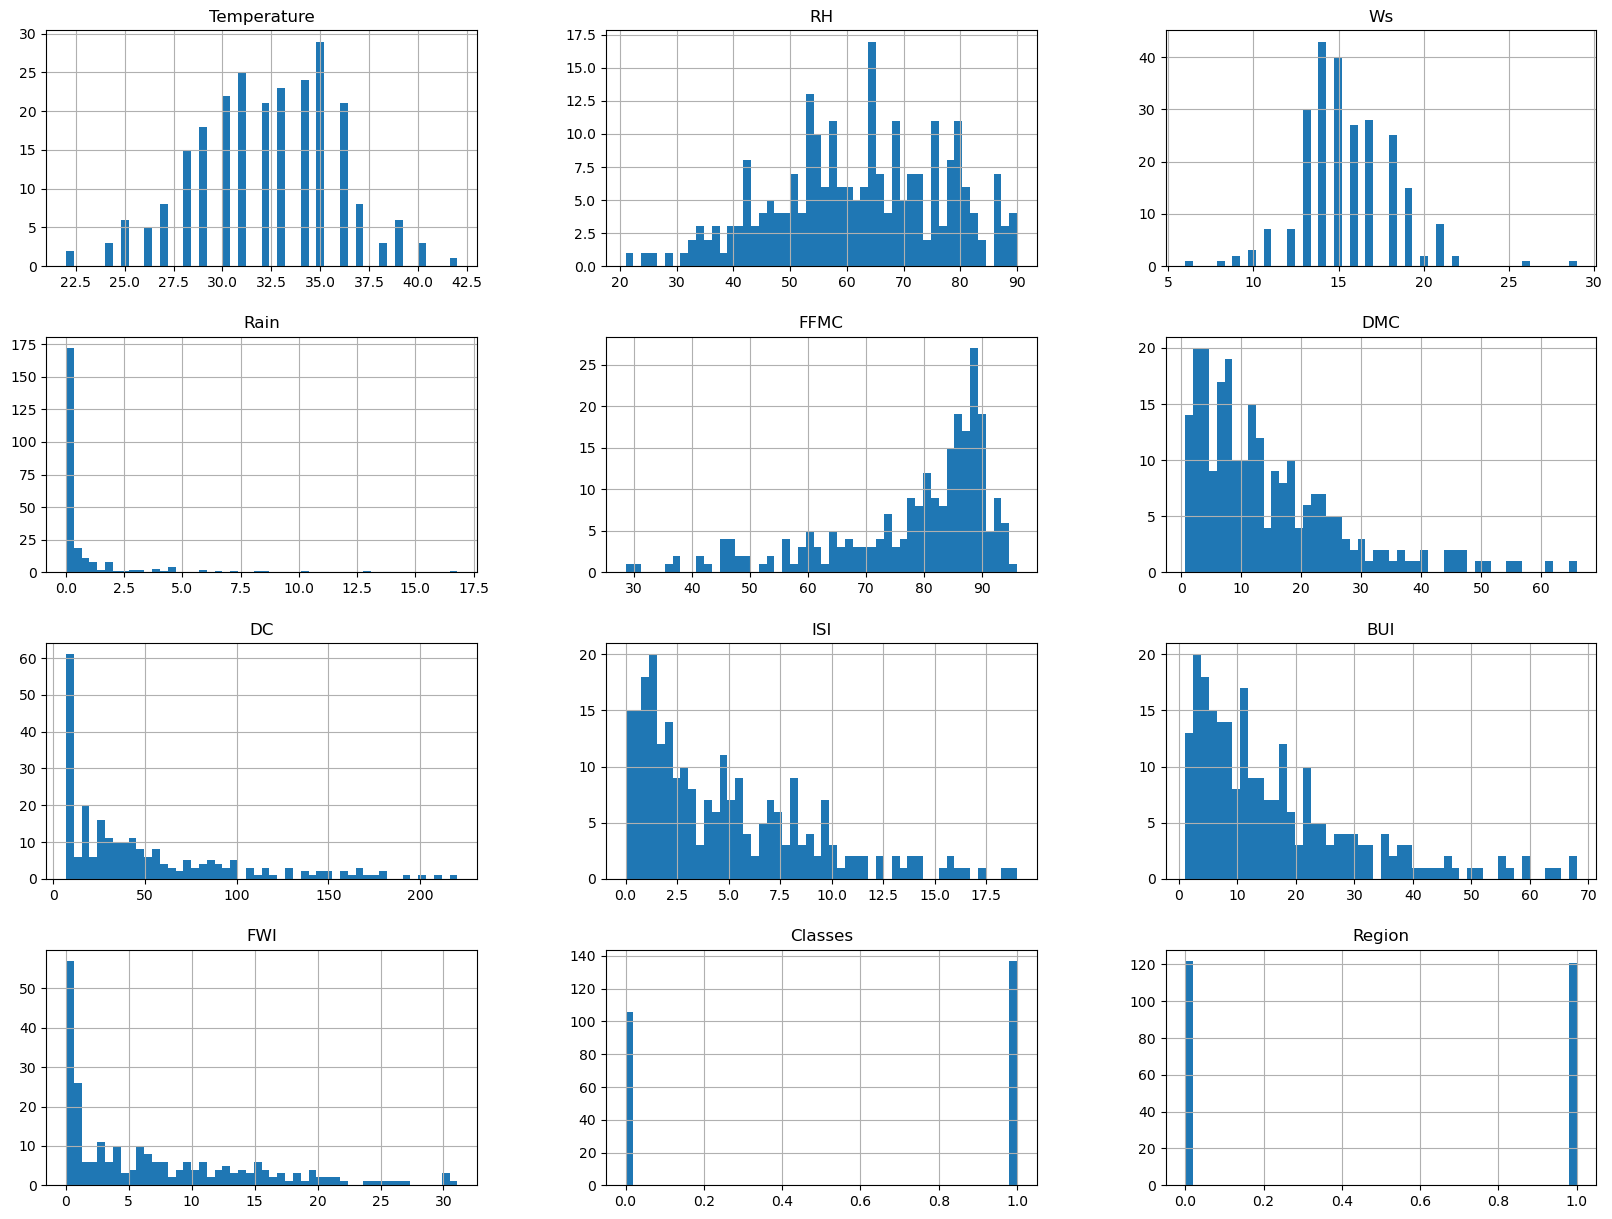

In [33]:
# Plot density plots for all features

#plt.style.use('seaborn')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Monthly Fire Analysis in the Bejaia Region')

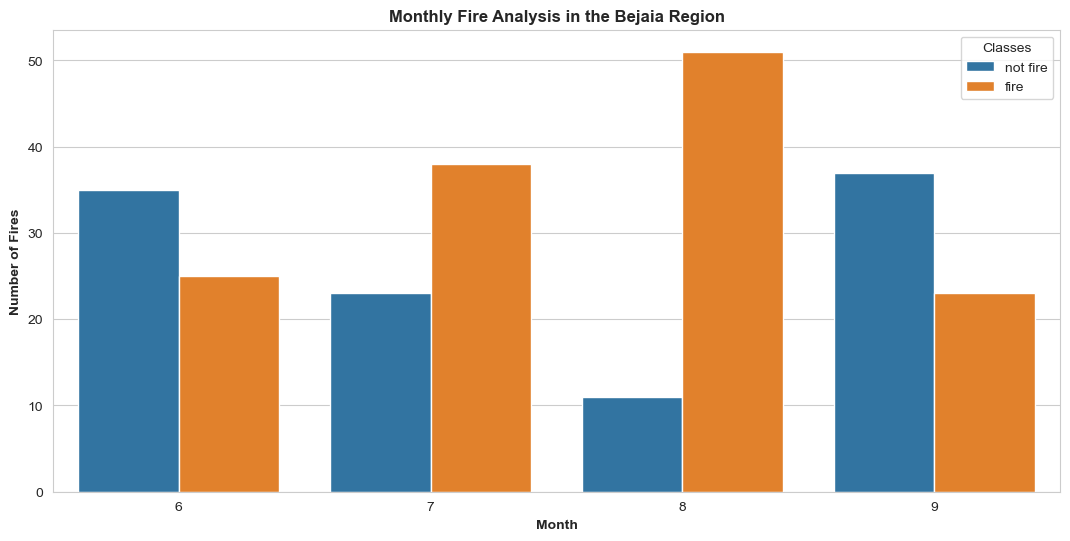

In [38]:
# Monthly Fire Analysis in the Bejaia Region
df_temp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x=df['month'], hue=df['Classes'])
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Monthly Fire Analysis in the Bejaia Region', weight='bold')

Text(0.5, 1.0, 'Monthly Fire Analysis in the Sidi-Bel Abbes Region')

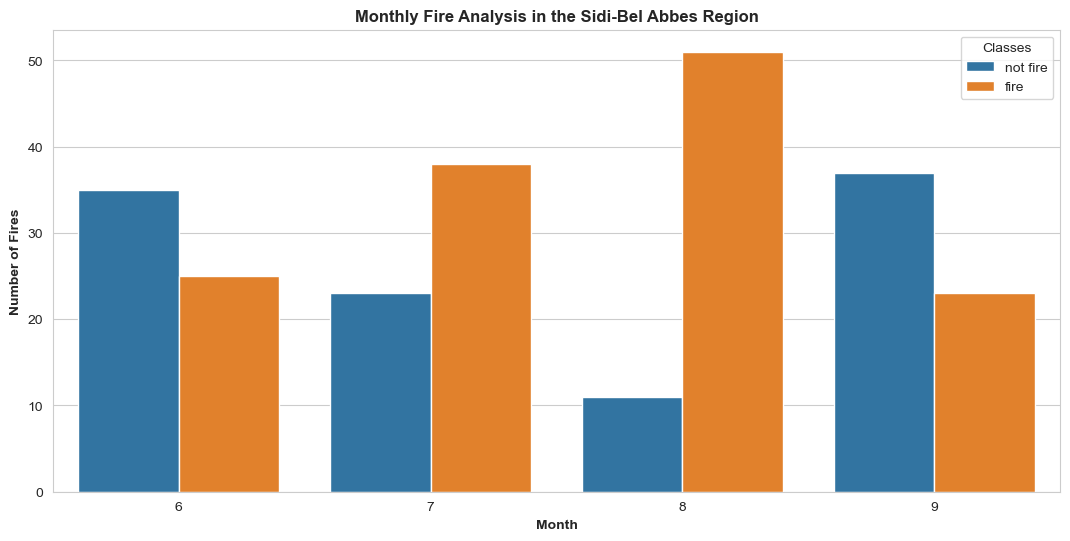

In [39]:
# Monthly Fire Analysis in the Sidi-Bel Abbes Region
df_temp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x=df['month'], hue=df['Classes'])
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')
plt.title('Monthly Fire Analysis in the Sidi-Bel Abbes Region', weight='bold')

#### Observations
1. Fires occured in the following 4 months only - June,July,August,September.
2. In both of the regions the most number of fires occured in the month of August.
3. Both the regions show very similar trends in the number of fires occured.

In [40]:
# Checking the correlation

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

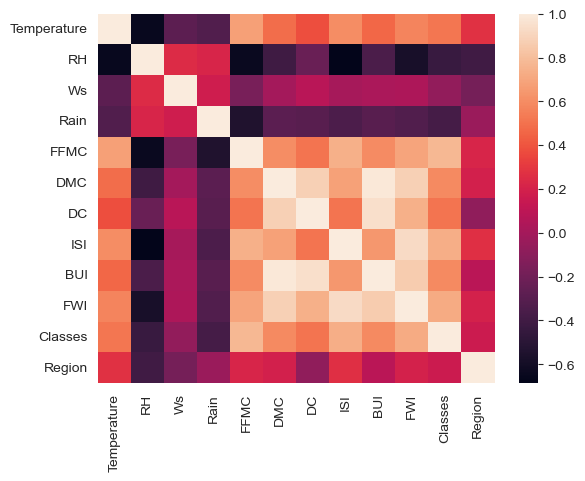

In [41]:
# Checking the correlation using a heatmap

sns.heatmap(df_copy.corr())

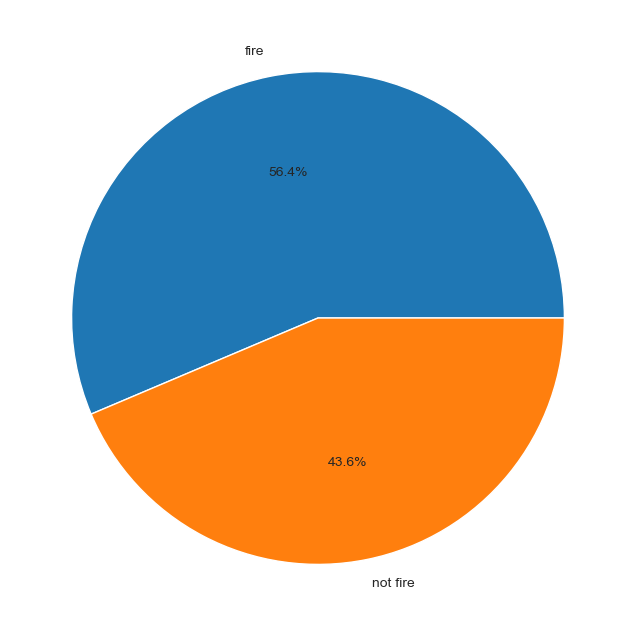

In [44]:
# Percentage of Fires to Not Fires

import seaborn as sns
import matplotlib.pyplot as plt

# data
category = df["Classes"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category, labels=category.index, autopct='%1.1f%%')
plt.show()

In [45]:
# exporting the claned dataset
df_copy.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)